# Permutation tests

We demonstrate the tests from the permutation module. 

Permutations are generic way to estimate the distribution of the test statistic under the null hypothesis that both samples originate have been drawn from the same population. Once the distribution of the test statistic under the null is known, we can compute the p-value for the actually obtained value of the test statistic.

The results are compared to the corresponding tests in scipy, which compute the p-value either exactly, if possible, or with asymptotic theory. Our example samples are drawn from the normal distribution, where the mean and the variance is varied.

In [1]:
from resample import permutation as perm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
rng = np.random.default_rng(1)

d = {
    "x": rng.normal(0, 1, size=100),
    "y": rng.normal(1, 1, size=100),
    "z": rng.normal(0, 2, size=100)
}

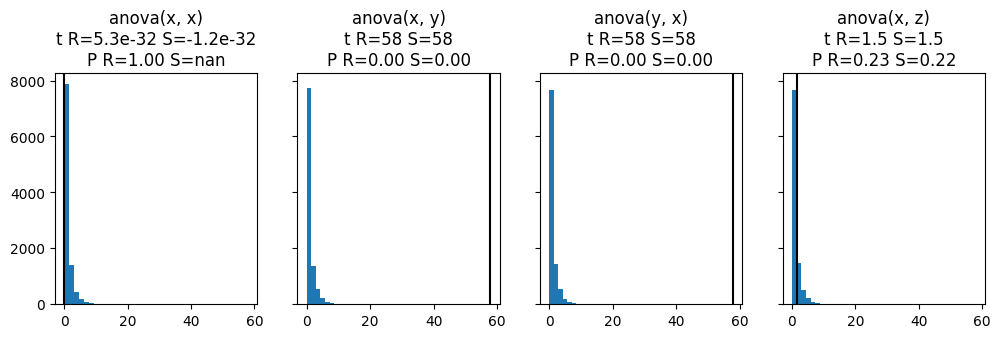

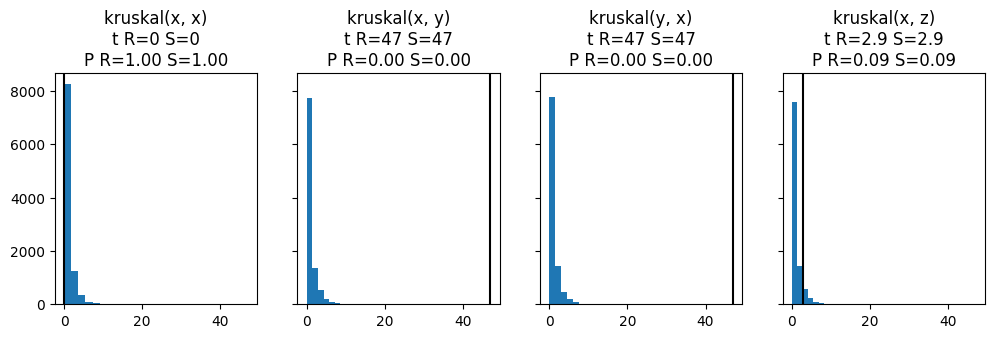

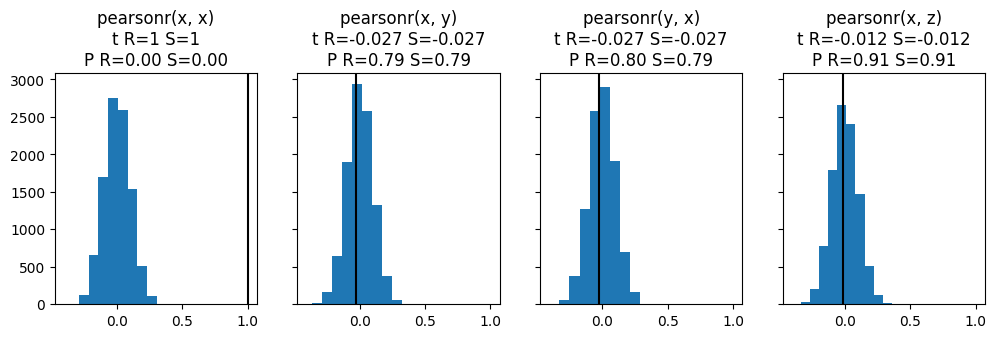

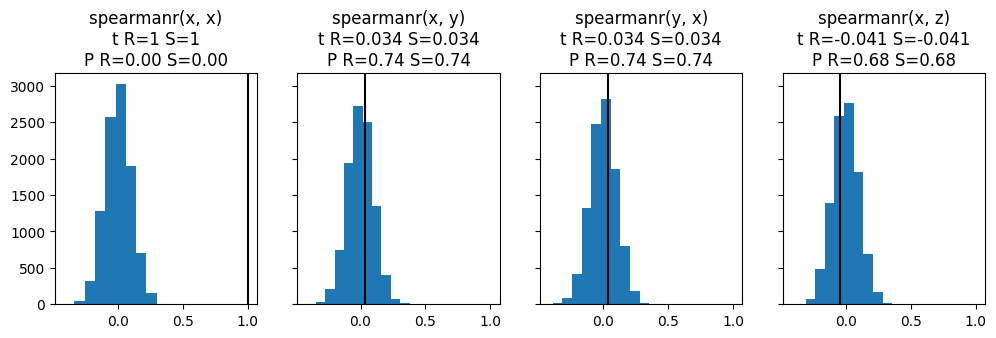

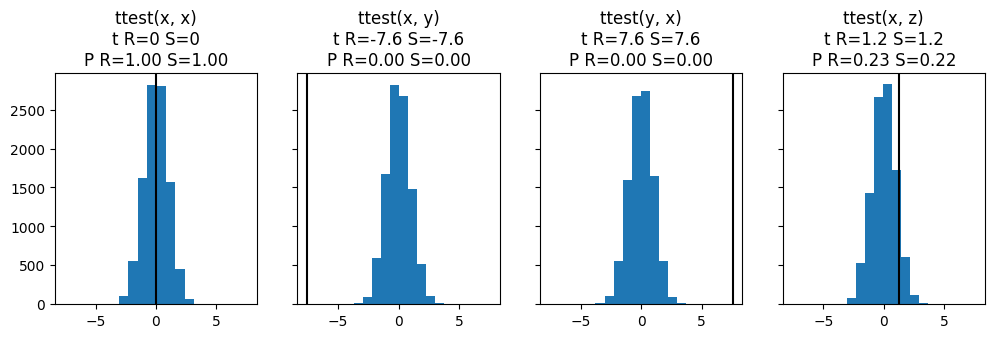

In [3]:
for test_name in ("anova",
                  "kruskal",
                  "pearsonr",
                  "spearmanr",
                  "ttest"):

    test = getattr(perm, test_name)
    fig, ax = plt.subplots(1, 4, figsize=(12, 3),
                           sharex=True, sharey=True)

    correspondence = {
        "ks": "ks_2samp",
        "pearsonr": "pearsonr",
        "spearmanr": "spearmanr",
        "ttest": "ttest_ind",
        "anova": "f_oneway",
    }
    sc_test = getattr(stats, correspondence.get(test_name, test_name))
    
    for axi, (a, b) in zip(ax, "xx xy yx xz".split()):
        r = test(d[a], d[b], random_state=1)
        sc = sc_test(d[a], d[b])
        plt.sca(axi)
        plt.hist(r.samples)
        plt.axvline(r.statistic, color="k")
        plt.title(f"{test_name}({a}, {b})\n"
                  f"t R={r.statistic:.2g} S={sc[0]:.2g}\n"
                  f"P R={r.pvalue:.2f} S={sc[1]:.2f}")